In [3]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE you'll need latex compiler for proper work of next option,
#      if you don't have one, just set next option to false

plt.rcParams['text.usetex'] = True

In [62]:
POINT_TO_COMPUTE_INACCURRACY = 42

def get_next_h_step(step_num):
    return 2 / 2 ** (step_num)

target_h_range = np.array(list(map(lambda step_num: get_next_h_step(step_num), np.arange(1, 21, 1))))


In [63]:
class TargetFunction:
    def __init__(self, name, function, derivative):
        self.name = name

        # ha-ha thinking about invariant protection in language without 'private' acess modifier
        self._function = function
        self._derivative = derivative
    
    def compute_inaccuracy(self, approx_derivative_func, h_step, point):
        computed_derivative_value = approx_derivative_func(self._function, h_step, point)
        return np.abs(computed_derivative_value - self._derivative(point))
    


In [64]:
target_functions = np.array([
    TargetFunction("sin(x^2)", 
                    lambda x: np.sin(x**2),                  
                    lambda x: 2*np.cos(x**2)
                  ),

    TargetFunction("cos(sin(x))", 
                   lambda x: np.cos(np.sin(x)),
                   lambda x: -np.sin(np.sin(x)) * np.cos(x)
                  ),

    TargetFunction("e^{sin(cos(x))}", 
                   lambda x: np.exp(np.sin(np.cos(x))),
                   lambda x:  np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * (-np.sin(x)) 
                  ),

    TargetFunction("log(x + 3)", 
                   lambda x: np.log(x + 3),
                   lambda x: 1 / (x + 3)
                  ),

    # NOTE: I suggested to replace (x + 3)**(0.5) by np.sqrt(x + 3) 'coz it's way more efficient. 
    #       Ha-ha thinking about performance in python ;C
    TargetFunction("(x + 3)^{0.5}", 
                   lambda x: np.sqrt(x + 3),
                   lambda x: 1 / (2 * np.sqrt(x + 3))
                  ), 
])

In [65]:
approx_derivative_methods = np.array([
    lambda target_func, h_step, point:         ( target_func(point + h_step)   - target_func(point         ) ) / (     h_step ),
    lambda target_func, h_step, point:         ( target_func(point         )   - target_func(point - h_step) ) / (     h_step ),
    lambda target_func, h_step, point:         ( target_func(point + h_step)   - target_func(point - h_step) ) / ( 2 * h_step ),
    
    lambda target_func, h_step, point:   4/3 * ( target_func(point +     h_step) - target_func(point -     h_step) ) / ( 2 * h_step ) 
                                       - 1/3 * ( target_func(point + 2 * h_step) - target_func(point - 2 * h_step) ) / ( 4 * h_step ),
    
    lambda target_func, h_step, point:   3/2  * ( target_func(point +     h_step) - target_func(point -     h_step) ) / ( 2 * h_step ) 
                                       - 3/5  * ( target_func(point + 2 * h_step) - target_func(point - 2 * h_step) ) / ( 4 * h_step ) 
                                       + 1/10 * ( target_func(point + 3 * h_step) - target_func(point - 3 * h_step) ) / ( 6 * h_step ),
])

In [66]:
def plot_inacurray_graph(target_function: TargetFunction, point=POINT_TO_COMPUTE_INACCURRACY):
    log_h_range = np.log(target_h_range) 
    
    fig = plt.figure()
    plt.xlabel("$log(h\_step)$")
    plt.ylabel("$log(inaccuracy)$")
    plt.title(f"function: ${target_function.name}$")

    plt.xticks(np.arange(log_h_range[-1], log_h_range[0] + 1, -log_h_range[1]), rotation=80)
    plt.grid()

    for method_num, approx_derivative in enumerate(approx_derivative_methods):
        inaccuracies = np.array([])

        for h_step in target_h_range:
            inaccuracies = np.append(inaccuracies, target_function.compute_inaccuracy(approx_derivative, h_step, point))

        plt.plot(log_h_range, np.log(inaccuracies), "--o", label=f"method \#${method_num + 1}$")
        plt.legend()
        plt.savefig(f"graphs/graph_of_'{target_function.name}'.png")

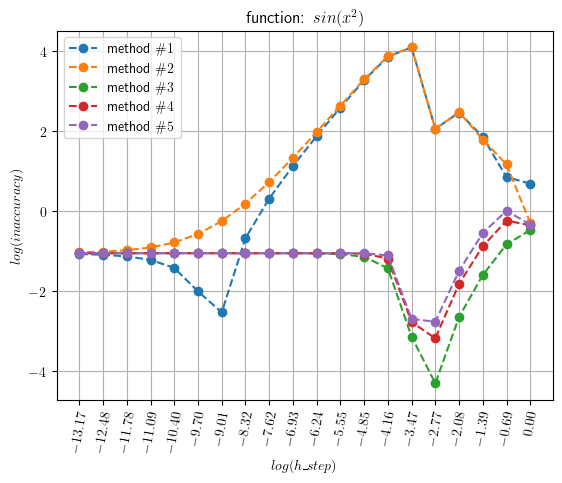

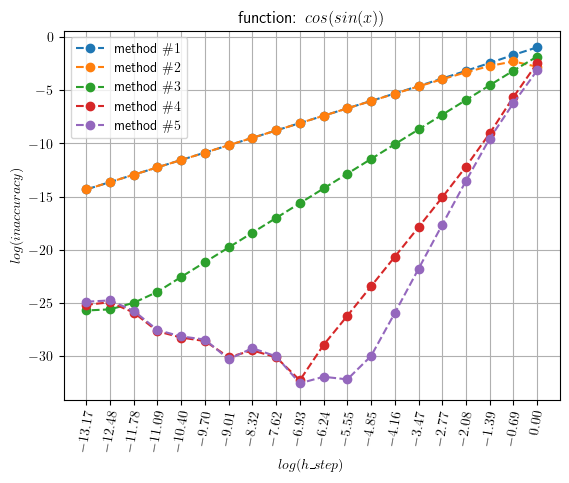

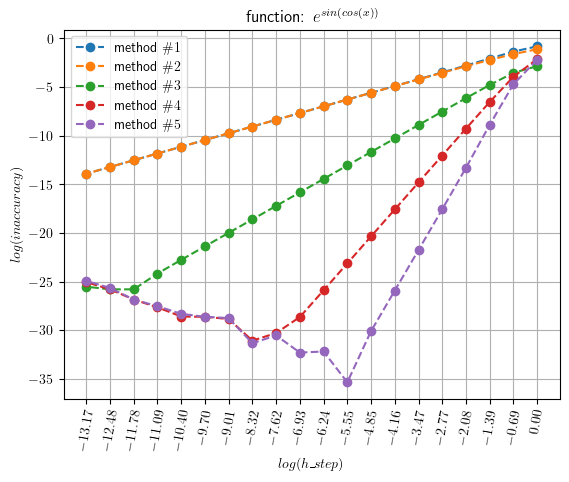

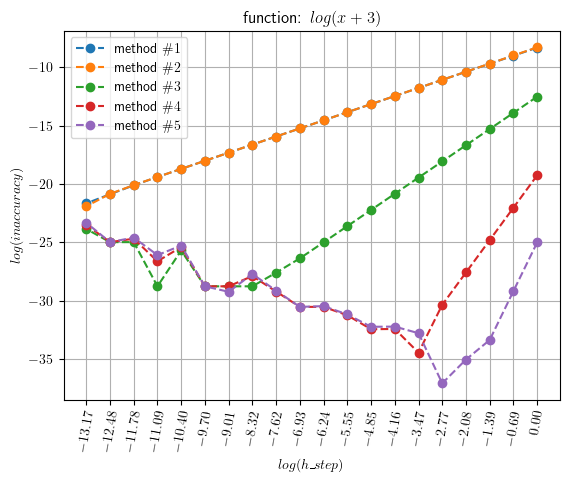

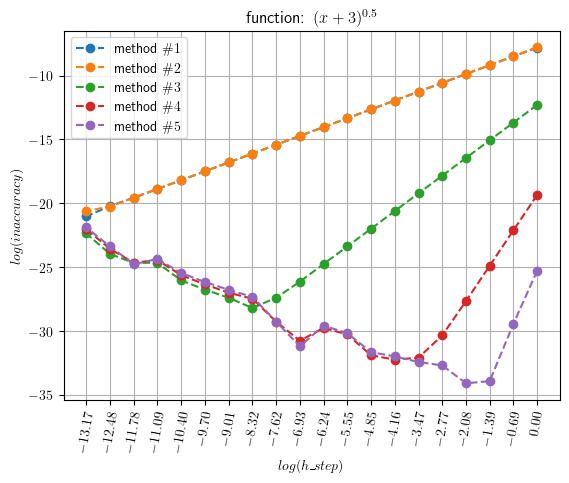

In [67]:
for target_function in target_functions:
    plot_inacurray_graph(target_function)